In [94]:
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef
from sklearn.manifold import MDS
import umap.umap_ as umap
sns.set(context='notebook', style='white', rc={'figure.figsize':(14, 10)})

In [ ]:
mnist = fetch_openml('mnist_784')

In [69]:
df = mnist.data / 255.0 # get pixels
y = mnist.target # get labels
feat_cols = df.columns #get name of columns before adding labels
df['y'] = y.cat.codes # merge

np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
N = 1000
mnist_subset = df.loc[rndperm[:N], :].copy() #use only a subset of samples
data_subset = mnist_subset[feat_cols].values


pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

mnist_subset['pca-one'] = pca_result[:, 0]
mnist_subset['pca-two'] = pca_result[:, 1] 
mnist_subset['pca-three'] = pca_result[:, 2]

tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

mnist_subset['tsne-2d-one-p10'] = tsne_results[:, 0]
mnist_subset['tsne-2d-two-p10'] = tsne_results[:, 1]

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

mnist_subset['tsne-2d-one-p50'] = tsne_results[:, 0]
mnist_subset['tsne-2d-two-p50'] = tsne_results[:, 1]

tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

mnist_subset['tsne-2d-one-p100'] = tsne_results[:, 0]
mnist_subset['tsne-2d-two-p100'] = tsne_results[:, 1]


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.024s...
[t-SNE] Computed neighbors for 1000 samples in 0.103s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.174763
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.590218
[t-SNE] KL divergence after 300 iterations: 1.737890
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.049s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.924232
[t-SNE] KL divergence after 50 iterations with early exaggeration: 63.472134
[t-SNE] KL divergence after 300 iterations: 0.969649
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.005s...
[t-SNE] Computed neighbors for 1000 samples in 0.071s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 3.201962
[t-SNE] KL divergence after 5

In [84]:
#reducer = umap.UMAP(random_state=42)
#reducer.fit(data_subset)
#embedding = reducer.transform(data_subset)

embedding = umap.UMAP(n_neighbors=5, random_state=42).fit(data_subset).transform(data_subset)

mnist_subset['umap0-n5'] = embedding[:, 0]
mnist_subset['umap1-n5'] = embedding[:, 1]

embedding = umap.UMAP(n_neighbors=30, random_state=42).fit(data_subset).transform(data_subset)

mnist_subset['umap0-n30'] = embedding[:, 0]
mnist_subset['umap1-n30'] = embedding[:, 1]

In [91]:
# now tsne on pca data

pca_100 = PCA(n_components=100)
pca_result_100 = pca_100.fit_transform(data_subset)

tsne_after_pca = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=300).fit_transform(data_subset)

mnist_subset['tsne_after_pca_0'] = tsne_after_pca[:,0]
mnist_subset['tsne_after_pca_1'] = tsne_after_pca[:,1]

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.004s...
[t-SNE] Computed neighbors for 1000 samples in 0.114s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.516359
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.994812
[t-SNE] KL divergence after 300 iterations: 1.526278


In [96]:
# now compute the non metric mds


mds_res = MDS(n_components=2, metric=False, normalized_stress='auto').fit_transform(data_subset)

mnist_subset['mds0'] = mds_res[:,0]
mnist_subset['mds1'] = mds_res[:,1]

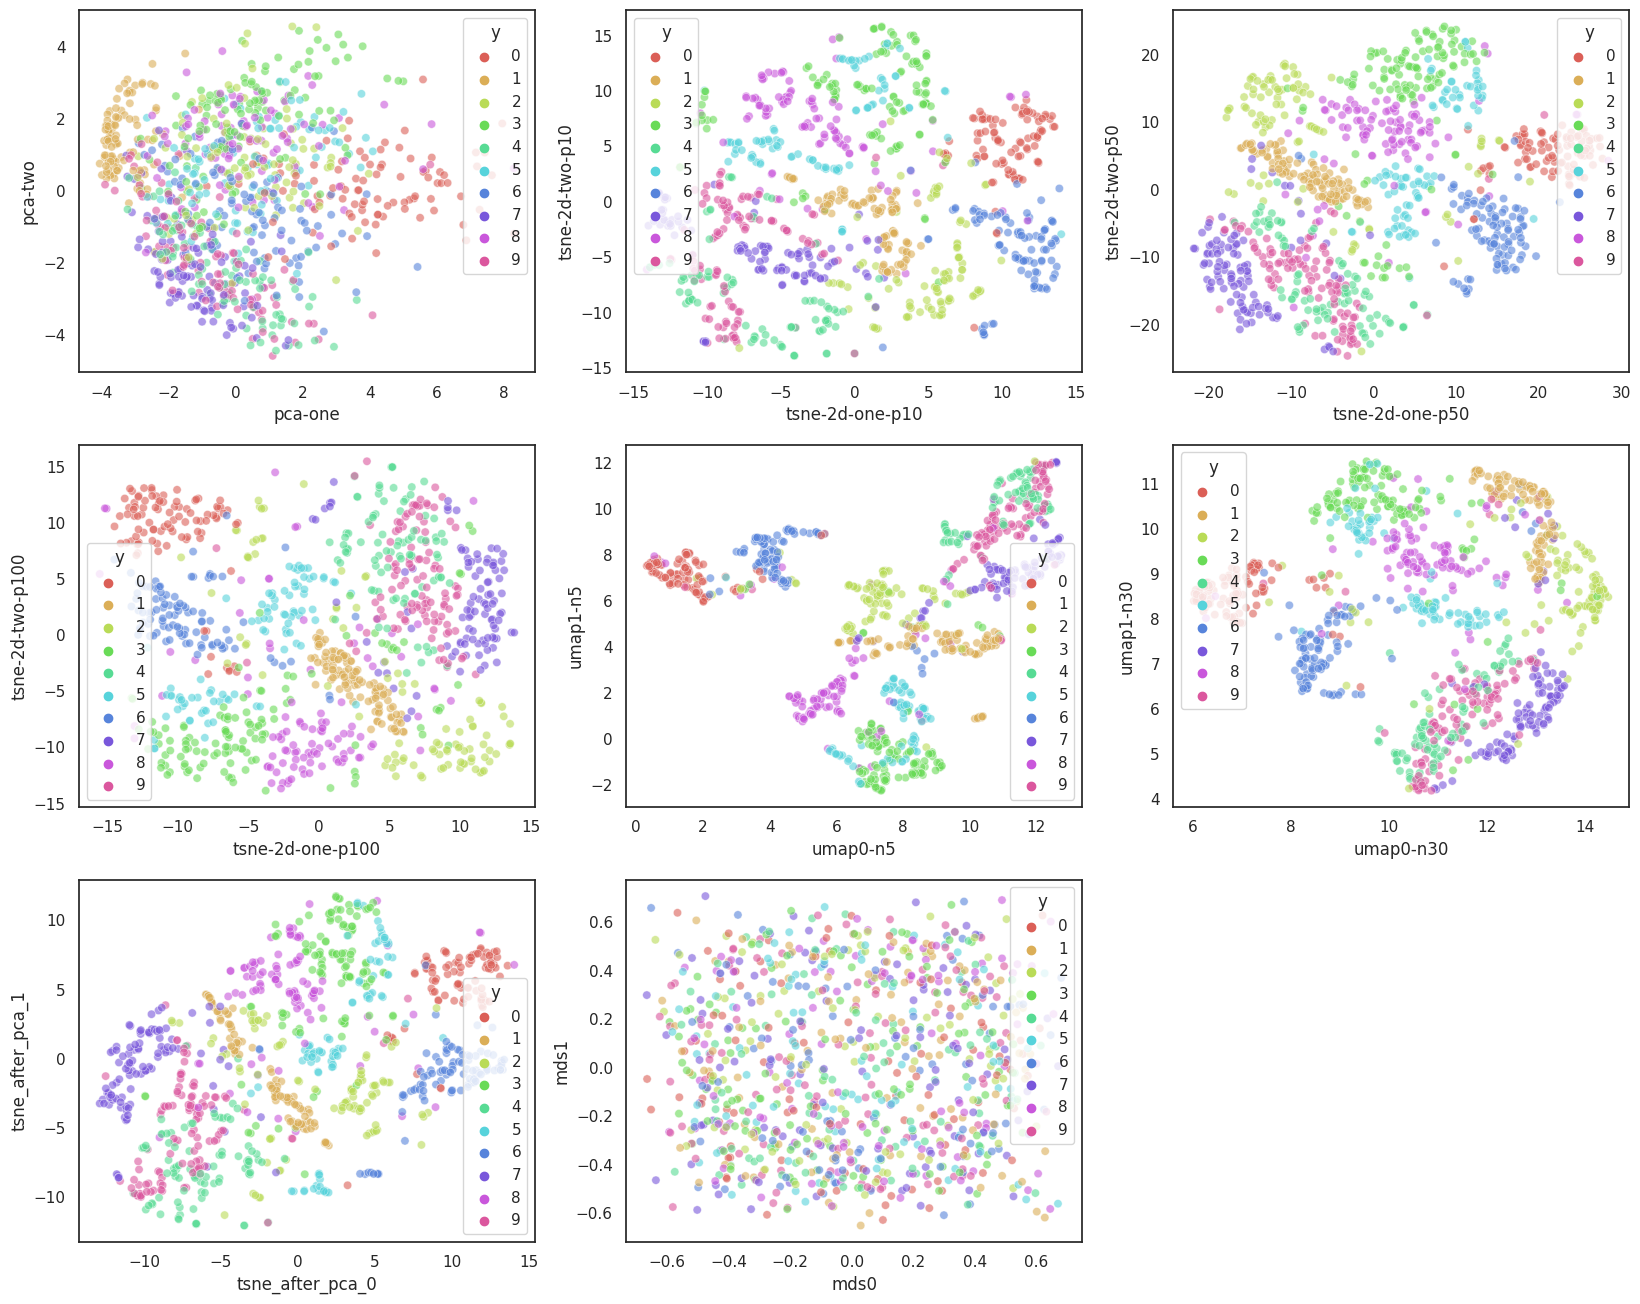

In [98]:
plt.figure(figsize=(20, 16))

ax1 = plt.subplot(3, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.6,
    ax=ax1
)

ax2 = plt.subplot(3, 3, 2)
sns.scatterplot(
    x="tsne-2d-one-p10", y="tsne-2d-two-p10",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.6,
    ax=ax2
)

ax3 = plt.subplot(3, 3, 3)
sns.scatterplot(
    x="tsne-2d-one-p50", y="tsne-2d-two-p50",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.6,
    ax=ax3
)


ax4 = plt.subplot(3, 3, 4)
sns.scatterplot(
    x="tsne-2d-one-p100", y="tsne-2d-two-p100",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.6,
    ax=ax4
)


ax5 = plt.subplot(3, 3, 5)
sns.scatterplot(
    x="umap0-n5", y="umap1-n5",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=mnist_subset,
    legend="full",
    alpha=0.6,
    ax=ax5,

)


ax6 = plt.subplot(3, 3, 6)
sns.scatterplot(
    x="umap0-n30", y="umap1-n30",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=mnist_subset,
    legend="full",
    alpha=0.6,
    ax=ax6,

)

ax7 = plt.subplot(3, 3, 7)
sns.scatterplot(
    x="tsne_after_pca_0", y="tsne_after_pca_1",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=mnist_subset,
    legend="full",
    alpha=0.6,
    ax=ax7,

)

ax8 = plt.subplot(3, 3, 8)
sns.scatterplot(
    x="mds0", y="mds1",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=mnist_subset,
    legend="full",
    alpha=0.6,
    ax=ax8,

)

plt.show()
